# **Spam Email Detection**
---
Implementing spam email detection as a feature is highly beneficial for enhancing user experience and security. By automatically filtering out unwanted and potentially harmful emails, users are protected from phishing attacks, malware, and other malicious content. This not only reduces the likelihood of users falling victim to scams but also improves email organization by keeping the inbox free of clutter. As a result, users can focus on important messages without the distraction of spam. Additionally, spam detection can save time by minimizing the need to manually sort through emails, thereby increasing productivity. From a business perspective, it also helps maintain the integrity of communication channels, ensuring that legitimate emails are not overlooked amidst spam, thereby improving overall communication efficiency.

# **⏬Importing Data**

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('email_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **🧿Data Observation**

In [3]:
# getting dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# **⚡Data Preprocessing**

In [4]:
# adding spam feature
df['Spam'] = df['Category'].apply(lambda x:1 if x=='spam' else 0)
df = df[['Message', 'Spam']]
df.head()

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


## **🥽Lowercasing**

In [5]:
# converting all words to lowercase
df['Message'] = df['Message'].str.lower()
df.head()

,Message,Spam
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0


## **🍯Removing Punctuation**

In [6]:
df['Message'] = df['Message'].str.replace(r'[^\w\s]', '', regex=True)
df.head()

,Message,Spam
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i dont think he goes to usf he lives aroun...,0


## **🍨Removing Non-Alphabetic Characters**

In [7]:
df['Message'] = df['Message'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df.head()

,Message,Spam
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in a wkly comp to win fa cup final...,1
3,u dun say so early hor u c already then say,0
4,nah i dont think he goes to usf he lives aroun...,0


## **⚾Tokenization**

In [8]:
df['Message'] = df['Message'].str.split()
df.head()

,Message,Spam
0,"[go, until, jurong, point, crazy, available, o...",0
1,"[ok, lar, joking, wif, u, oni]",0
2,"[free, entry, in, a, wkly, comp, to, win, fa, ...",1
3,"[u, dun, say, so, early, hor, u, c, already, t...",0
4,"[nah, i, dont, think, he, goes, to, usf, he, l...",0


## **🧵Removing Stop Words**

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Message'] = df['Message'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,Message,Spam
0,"[go, jurong, point, crazy, available, bugis, n...",0
1,"[ok, lar, joking, wif, u, oni]",0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",1
3,"[u, dun, say, early, hor, u, c, already, say]",0
4,"[nah, dont, think, goes, usf, lives, around, t...",0


## **🧨Lemmatization**
Reduces words to their canonical form (lemmatization), so that variations of a word are treated as the same word.

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Message'] = df['Message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

,Message,Spam
0,"[go, jurong, point, crazy, available, bugis, n...",0
1,"[ok, lar, joking, wif, u, oni]",0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",1
3,"[u, dun, say, early, hor, u, c, already, say]",0
4,"[nah, dont, think, go, usf, life, around, though]",0


## **📌Rejoining Words into Sentences**

In [15]:
# rejoining the sentences
df['Message'] = df['Message'].apply(lambda x: ' '.join(x))
df.head()

,Message,Spam
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah dont think go usf life around though,0


# **🔢Vectorizing the Mails**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 1)
X = vectorizer.fit_transform(df['Message'])

In [17]:
# looking at extracted features
print(X[0])

  (0, 7478)	0.19951151603143516
  (0, 233)	0.34991432802526723
  (0, 2722)	0.1640411678130794
  (0, 1193)	0.2956090383151331
  (0, 885)	0.3340310489896538
  (0, 3660)	0.28686783908578817
  (0, 7702)	0.23779337276010057
  (0, 2759)	0.19475744886941995
  (0, 887)	0.2956090383151331
  (0, 460)	0.26608154599358036
  (0, 1456)	0.2709845600501747
  (0, 5132)	0.23892890113851328
  (0, 3513)	0.34991432802526723
  (0, 2669)	0.15482595951135011


In [18]:
# defining the output feature
y = df['Spam']

## **⚡Oversampling**

In [19]:
y.value_counts()

Spam
0    4825
1     747
Name: count, dtype: int64

In [20]:
# oversampling
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state = 42)
X, y = oversampler.fit_resample(X,y)

y.value_counts()

Spam
0    4825
1    4825
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **🤖ML Model Testing**

### **Extra Trees Classifier**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1240
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      2413
   macro avg       1.00      1.00      1.00      2413
weighted avg       1.00      1.00      1.00      2413



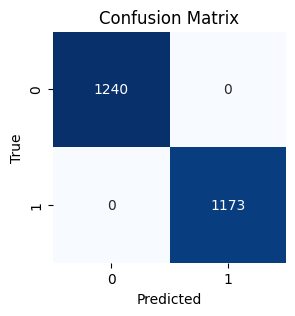

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating an instance of Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

# Making predictions
et_y_pred = et_model.predict(X_test)

# Checking score
et_accuracy = accuracy_score(y_test, et_y_pred)

# Printing Classification Report
print(classification_report(y_test, et_y_pred))

# Plotting Confusion Matrix (3x3 size)
cm = confusion_matrix(y_test, et_y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

So, we can see that **`Extra Trees Classifier`** performs the best with very near to `100%` accuracy. We now design a pipeline and then test with a few examples.

# **📚Pipeline**

In [23]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

def pre_process(mail):
    # Convert to lowercase
    mail = mail.lower()
    
    # Remove punctuation and non-alphabetic characters using regex
    mail = re.sub(r'[^\w\s]', '', mail)
    mail = re.sub(r'[^a-zA-Z\s]', '', mail)
    
    # Tokenize (split the text into words)
    mail = mail.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    mail = [word for word in mail if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    mail = [lemmatizer.lemmatize(word) for word in mail]
    
    # Rejoin the tokens into a single string
    mail = ' '.join(mail)
    
    return mail

def predict(mail):
    # Pre-process the input mail
    mail = pre_process(mail)

    # Transform the mail using the already fitted vectorizer
    mail_vector = vectorizer.transform([mail])  # Note: transform, not fit_transform

    # Predict the label using the Extra Trees model
    y_pred = et_model.predict(mail_vector)
    
    return y_pred

# **📌Testing Model with Examples**

In [24]:
# Sample emails
mails = [
    "Hey, the package you ordered has arrived. I let it in the balcony under the chair. Take it when you return home! Love Moore",
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize now!",
    "Don't forget our meeting at 3 PM today. Looking forward to discussing the new project.",
    "You just won a Million Dollars, Tap below to claim now!!!",
    "Lunch at 12? Let me know if you're free. We can try that new sushi place."
]

# Predict if each mail is spam or ham
for mail in mails:
    prediction = predict(mail)
    print(f"Mail: \"{mail}\"\nPrediction: {prediction[0]}\n")

Mail: "Hey, the package you ordered has arrived. I let it in the balcony under the chair. Take it when you return home! Love Moore"
Prediction: 0

Mail: "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize now!"
Prediction: 1

Mail: "Don't forget our meeting at 3 PM today. Looking forward to discussing the new project."
Prediction: 0

Mail: "You just won a Million Dollars, Tap below to claim now!!!"
Prediction: 1

Mail: "Lunch at 12? Let me know if you're free. We can try that new sushi place."
Prediction: 0



We can clearly see that the predicts are very accurate as to what they have been trained!

# **🙏THANK YOU**
---